In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import r2_score
from sklearn import svm
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

In [2]:
data = pd.read_csv('employee_survey_data.csv') # читаем файл
data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [3]:
data_1 = pd.read_csv('general_data.csv')  # читаем файл
data_1.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
data_2 = pd.read_csv('manager_survey_data.csv') # читаем файл
data_2.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [5]:
# соберем общий датасет из полученных данных
df = pd.merge(left=data_1, right=data[['EmployeeID', 'EnvironmentSatisfaction','JobSatisfaction', 'WorkLifeBalance']], how='inner', on='EmployeeID')
df = pd.merge(left=df, right=data_2[['EmployeeID', 'JobInvolvement', 'PerformanceRating']], how='inner', on='EmployeeID')

In [6]:
df.head() # смотрим 

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [8]:
#заполним пропущенные данные медианой 


df['NumCompaniesWorked'].fillna(df['NumCompaniesWorked'].median(), inplace=True)
df['TotalWorkingYears'].fillna(df['TotalWorkingYears'].median(), inplace=True)
df['EnvironmentSatisfaction'].fillna(df['EnvironmentSatisfaction'].median(), inplace=True)
df['JobSatisfaction'].fillna(df['JobSatisfaction'].median(), inplace=True)
df['WorkLifeBalance'].fillna(df['WorkLifeBalance'].median(), inplace=True)
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [10]:
#проверим уникальные значения категориальных колонок

df['Attrition'].value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

In [11]:
df['BusinessTravel'].value_counts()

Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64

In [12]:
df['Department'].value_counts()

Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64

In [13]:
df['EducationField'].value_counts()

Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: EducationField, dtype: int64

In [14]:
df['Gender'].value_counts()

Male      2646
Female    1764
Name: Gender, dtype: int64

In [15]:
df['JobRole'].value_counts()

Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
Name: JobRole, dtype: int64

In [16]:
df['MaritalStatus'].value_counts()

Married     2019
Single      1410
Divorced     981
Name: MaritalStatus, dtype: int64

In [17]:
def make_plot(feature_name):
    plt.figure(figsize = (16,5))
    ax = sns.countplot(x = feature_name, hue = 'Attrition', data = df, palette = 'Set2')
    plt.xlabel(feature_name)
    plt.ylabel('Employee count')
    plt.title('{} vs Attrition'.format(feature_name))
    plt.legend()

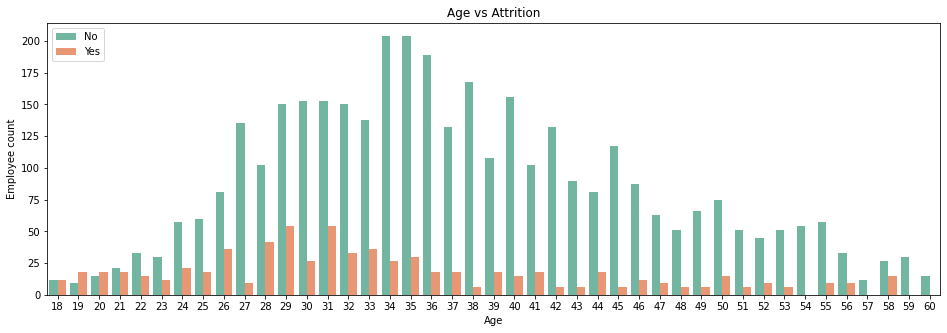

In [18]:
make_plot('Age')

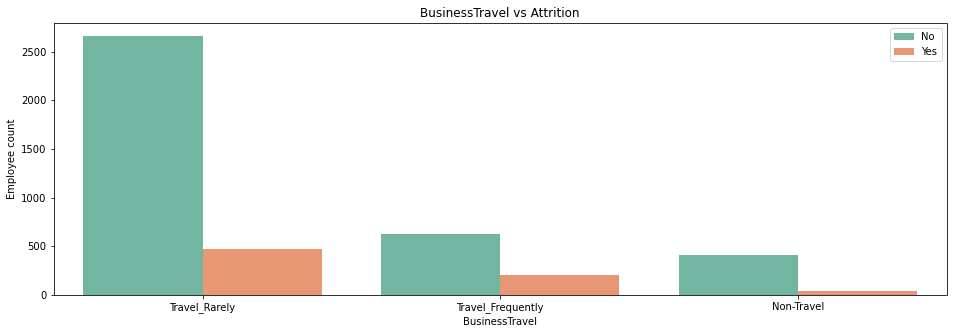

In [19]:
make_plot('BusinessTravel')

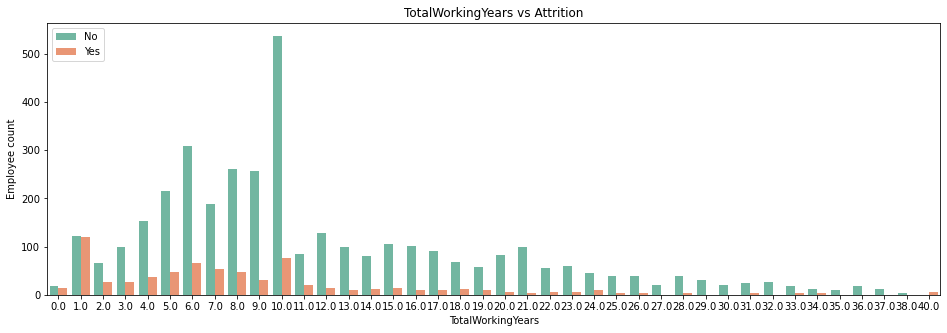

In [20]:
make_plot('TotalWorkingYears')

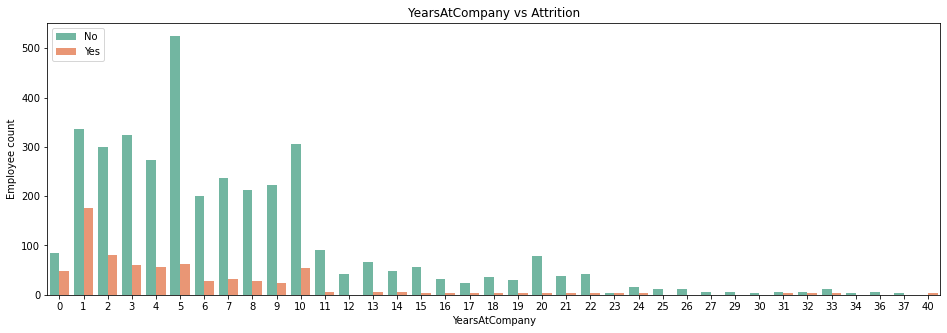

In [21]:
make_plot('YearsAtCompany')

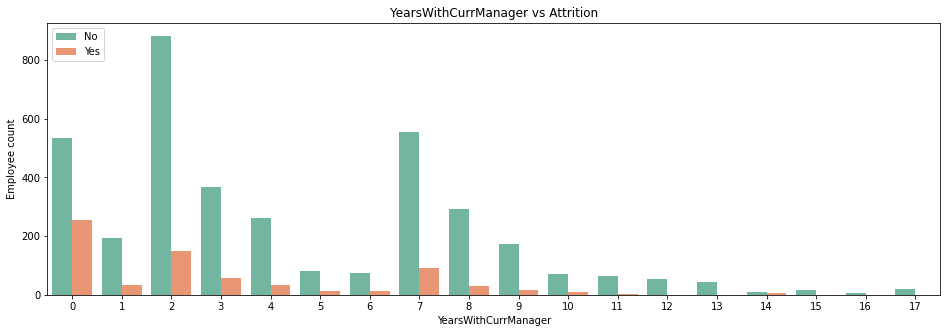

In [22]:
make_plot('YearsWithCurrManager')

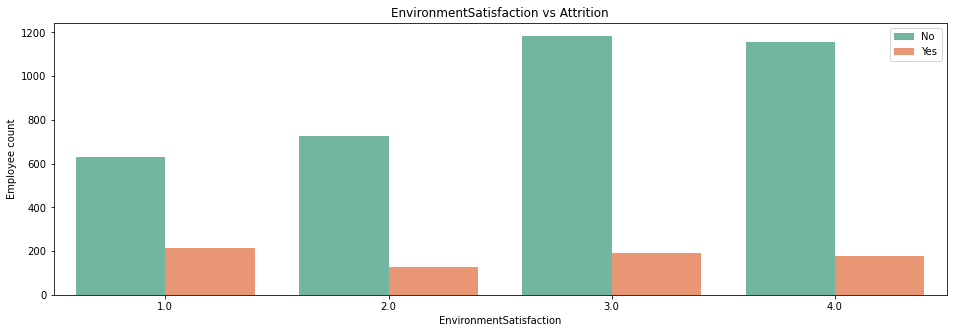

In [23]:
make_plot('EnvironmentSatisfaction')

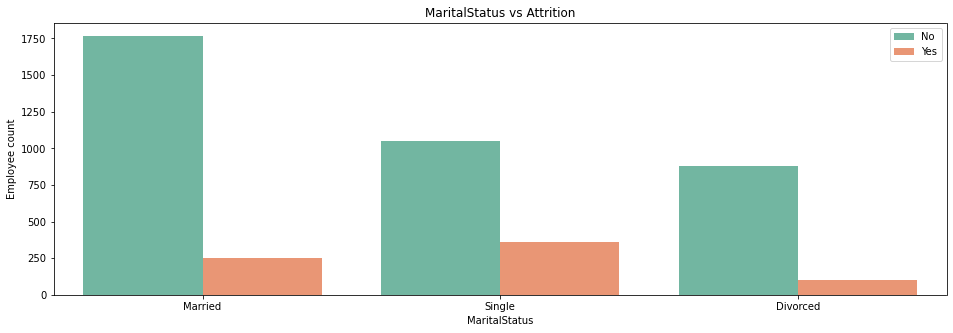

In [24]:
make_plot('MaritalStatus')

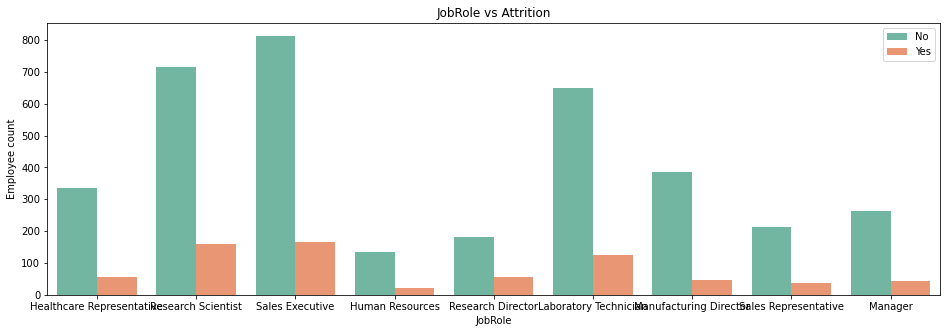

In [25]:
make_plot('JobRole')

In [26]:
# категориальные признаки переводим с помощью энкодера в числовые

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])
df['Gender'] = le.fit_transform(df['Gender'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int32  
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   int32  
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [27]:
# используем dummies для перевода признаков с категориями больше чем два в числовые

In [28]:
df = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 
                                               'JobRole', 'MaritalStatus'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   int64  
 1   Attrition                          4410 non-null   int32  
 2   DistanceFromHome                   4410 non-null   int64  
 3   Education                          4410 non-null   int64  
 4   EmployeeCount                      4410 non-null   int64  
 5   EmployeeID                         4410 non-null   int64  
 6   Gender                             4410 non-null   int32  
 7   JobLevel                           4410 non-null   int64  
 8   MonthlyIncome                      4410 non-null   int64  
 9   NumCompaniesWorked                 4410 non-null   float64
 10  Over18                             4410 non-null   object 
 11  PercentSalaryHike                  4410 non-null   int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

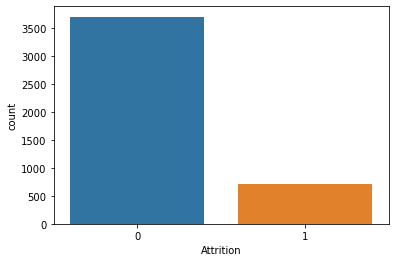

In [29]:
sns.countplot(x='Attrition', data=df)

In [30]:
len(df[df['Attrition']==1])/len(df)

# 16 процентов выгоревших сотрудников

0.16122448979591836

In [31]:
# удалим признаки ,которые постоянны по своему значению, а значит не оказывают никакого влияния 

df.drop(['EmployeeCount', 'StandardHours','Over18'], axis = 1, inplace = True)

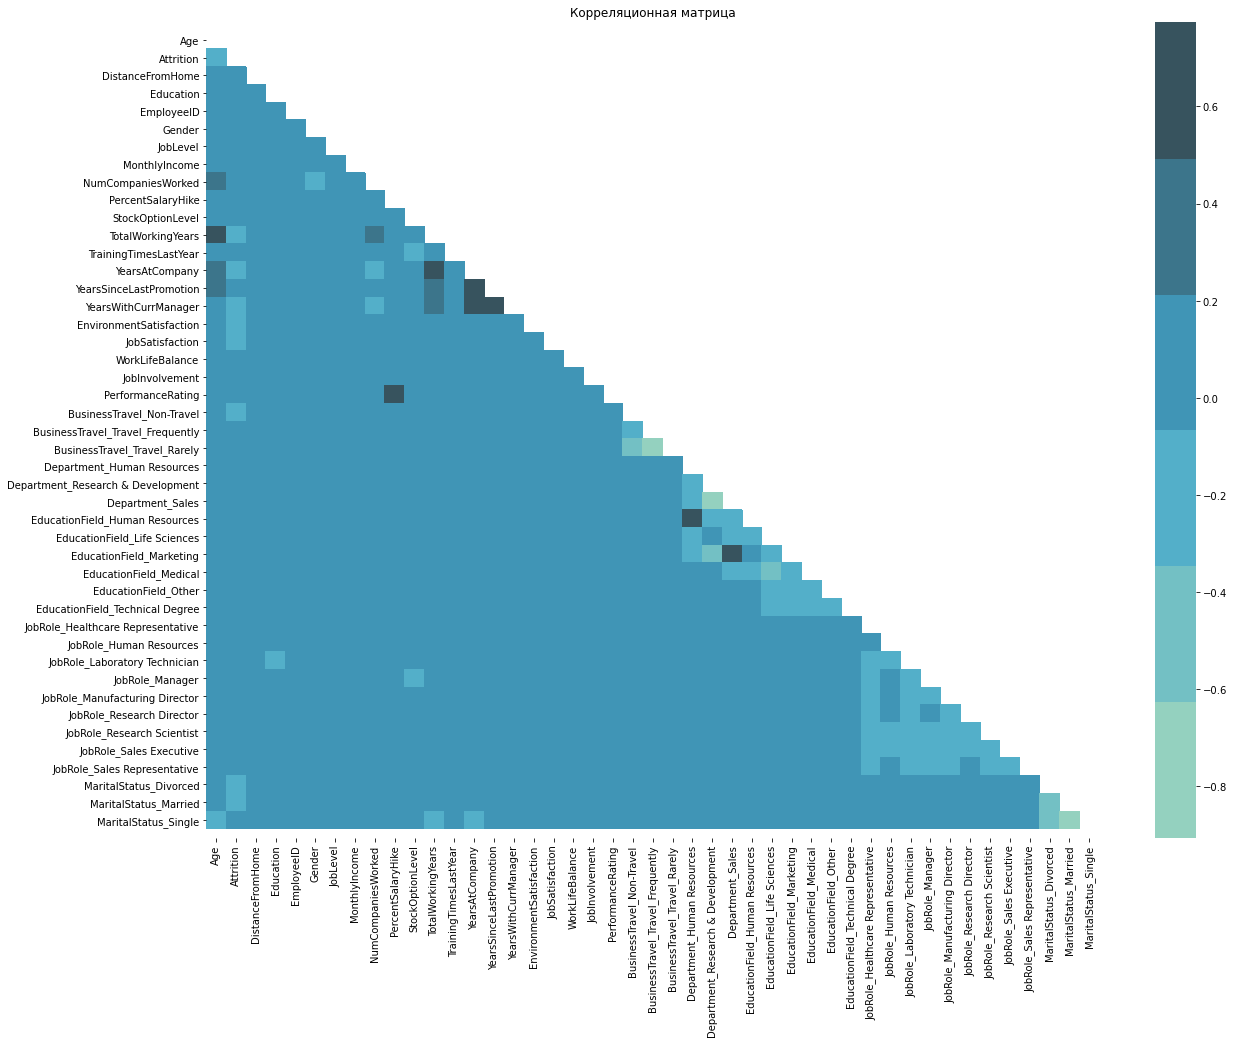

In [32]:
plt.figure(figsize=(20, 15))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
ax = sns.heatmap(df.corr(), annot=False, cmap=sns.color_palette("GnBu_d"),
                mask=mask)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)
plt.title('Корреляционная матрица')
plt.show()

In [40]:
X = df[['Age','DistanceFromHome','Education','JobLevel','MonthlyIncome','NumCompaniesWorked',
              'PercentSalaryHike','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear',
              'YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','EnvironmentSatisfaction','JobSatisfaction',
              'WorkLifeBalance','JobInvolvement','PerformanceRating', 'BusinessTravel_Non-Travel',
              'BusinessTravel_Travel_Frequently','BusinessTravel_Travel_Rarely','Department_Human Resources',
              'Department_Research & Development','Department_Sales','EducationField_Human Resources',
              'EducationField_Life Sciences','EducationField_Marketing','EducationField_Medical','EducationField_Other',
              'EducationField_Technical Degree','Gender','JobRole_Healthcare Representative',
              'JobRole_Human Resources','JobRole_Laboratory Technician','JobRole_Manager','JobRole_Manufacturing Director',
              'JobRole_Research Director','JobRole_Research Scientist','JobRole_Sales Executive','JobRole_Sales Representative',
              'MaritalStatus_Divorced','MaritalStatus_Married','MaritalStatus_Single']] #полный список колонок с данными для обучения]]


In [47]:

y = pd.Series(df['Attrition'] )

In [48]:
model = LogisticRegression(max_iter=1000)

In [51]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state = 20)
model.fit( X_train, y_train )

LogisticRegression(max_iter=1000)

In [52]:
print('Train score:',model.score(X_train, y_train))
print('Test score:', model.score(X_test, y_test))

Train score: 0.8422416585681892
Test score: 0.8306878306878307


In [58]:
#деревья 
from sklearn.tree import DecisionTreeRegressor

In [59]:
clf =  DecisionTreeRegressor(max_depth=12, max_features=42)

In [62]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state = 20)

In [65]:
clf.fit(X, y)

DecisionTreeRegressor(max_depth=12, max_features=42)

In [66]:
clf.predict(X_test)
clf.score(X_test, y_test)

0.898458806081663